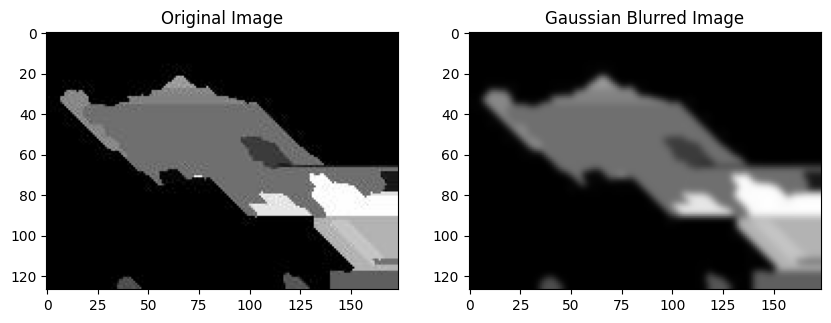

True

In [9]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image
# 필요한 매개변수 : 인풋 이미지 경로, 마스킴 이미지 경로, 최종 이미지 저장할 경로
# 외부로부터 image_path(마스킹 이미지 경로) 받아가지고 blurred image 저장하는 함수

def apply_gaussian_blur(masking_image_path, kernel_size=(9, 9), sigmaX=0):
    """
    Apply Gaussian blur to an image.

    :param image: Input image.
    :param kernel_size: Size of the Gaussian kernel.
    :param sigmaX: Gaussian kernel standard deviation in X direction.
    :return: Blurred image.
    """
    blurred_image = cv2.GaussianBlur(masking_image_path, kernel_size, sigmaX)

    save_path = image_path.rsplit('.', 1)[0] + '_blurred.png'
    cv2.imwrite(save_path, blurred_image)

def execute_main_py(text_prompt, input_image_path, mask_image_path, gen_img_path):
    """
    Execute the main.py script with given parameters.

    :param phrase: Text phrase for the script.
    :param input_image_path: Path to the input image.
    :param mask_image_path: Path to the mask image.
    :param output_path: Path to save the output.
    """
    """phrase = input("Enter the text phrase: ")
    input_image_path = input("Enter the path to the input image: ")
    mask_image_path = input("Enter the path to the mask image: ")
    output_path = input("Enter the output path: ")"""
    
    command = f"python main.py -p \"{text_prompt}\" -i \"{input_image_path}\" --mask \"{mask_image_path}\" --output_path \"{gen_img_path}\""
    subprocess.run(command, shell=True)

def apply_mask_to_image(gen_img_path, mask_image_path, output_path):
    """
    Apply a mask to an original image and save the result.

    :param input_image_path: Path to the original image.
    :param mask_image_path: Path to the mask image.
    :param output_path: Path to save the resulting image.
    """
    # 이미지 로드
    original = Image.open(gen_img_path)
    mask = Image.open(mask_image_path)

    # 원본 이미지와 마스킹 이미지의 크기가 다를 경우, 크기 조정
    if original.size != mask.size:
        mask = mask.resize(original.size)

    # 결과 이미지 초기화 (RGBA 모드로 투명도 지원)
    result = Image.new("RGBA", original.size)

    # 픽셀 데이터 로드
    original_pixels = original.load()
    mask_pixels = mask.load()
    result_pixels = result.load()

    # 픽셀 처리
    for y in range(original.size[1]):
        for x in range(original.size[0]):
            # 마스킹 이미지에서 검은색이 아닌 픽셀 처리
            if mask_pixels[x, y] != (0, 0, 0):
                result_pixels[x, y] = original_pixels[x, y]
            else:
                result_pixels[x, y] = (0, 0, 0, 0)  # 투명 픽셀

    # 결과 이미지 저장
    result.save(output_path)

